<a href="https://colab.research.google.com/github/tanish-garg-1/Multiple_predection_models/blob/main/Multiple_predection_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

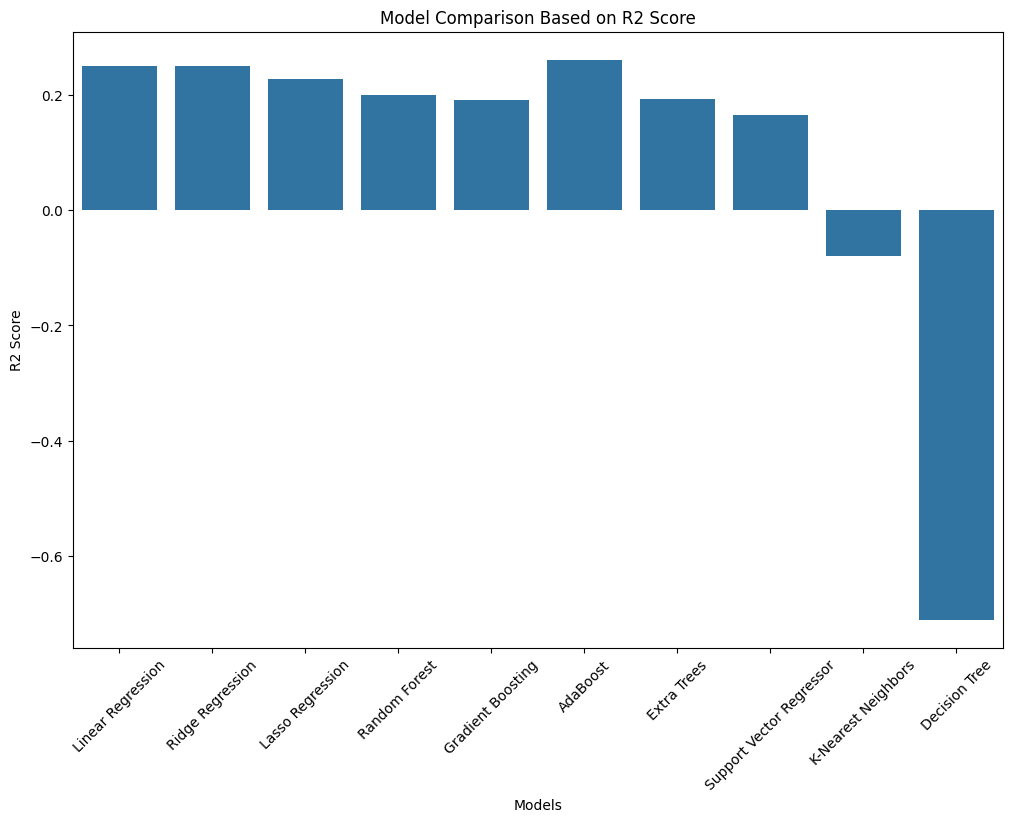

Upload the 'model_performance.csv' and any other relevant files to your GitHub repository.
Include README.md with details about the project and the analysis.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

data_file = 'Fuel_cell_performance_data-Full.csv'
data = pd.read_csv(data_file)

data = data.drop(columns=['Target2', 'Target3', 'Target4', 'Target5'])

X = data.drop(columns=['Target1'])  # Features
y = data['Target1']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=50, random_state=42),
    'Extra Trees': ExtraTreesRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR(kernel='rbf'),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

performance = {}

for model_name, model in models.items():

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    performance[model_name] = {
        'MSE': mse,
        'MAE': mae,
        'R2 Score': r2
    }

performance_df = pd.DataFrame(performance).T

plt.figure(figsize=(12, 8))
sns.barplot(x=performance_df.index, y=performance_df['R2 Score'])
plt.title('Model Comparison Based on R2 Score')
plt.ylabel('R2 Score')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.show()

performance_df.to_csv('model_performance.csv', index=True)

